<font size=4 color='darkturquoise'>

# [Pymatgen](https://pymatgen.org/)

<font size=4>
    
Pymatgen (Python Materials Genomics) es una biblioteca de Python de código abierto para el análisis de materiales. 

Estas son algunas de las características principales:

   * Clases altamente flexibles para la representación de objetos *Elemento, Sitio, Molécula, Estructura*.
   

   * Amplio soporte de entrada / salida, incluido el soporte para *VASP, ABINIT, CIF, Gaussian, XYZ* y muchos otros formatos de archivo.


   * Potentes herramientas de análisis, incluida la *generación de diagramas de fase, diagramas de Pourbaix, análisis de difusión, reacciones*, etc.
   

   * Análisis de estructuras electrónicas, como densidad de estados y estructura de bandas.
   

   * Integración con la API REST del Proyecto de Materiales, la Base de Datos Abierta de Cristalografía y otras fuentes de datos externas.

*A partir de 2020, pymatgen solo es compatible con Python 3 y versiones posteriores.*


<font size=4 color='darkturquoise'>

### ¿Por qué utilizar pymatgen?

<font size=4 >


Pymatgen ofrece varias ventajas sobre otros códigos que existen:

   * **Es (bastante) robusto**.  El análisis que produce sobrevive a un escrutinio riguroso todos los días. Los errores tienden a detectarse y corregirse rápidamente.


   * **Está bien documentado**. Se ha escrito una documentación bastante completa para ayudarlo a familiarizarse con ella rápidamente.


   * **Está abierto**. Eres libre de usar y contribuir a pymatgen. También significa que Pymatgen se mejora continuamente. 
    
    
   * **Es rápido**. Muchos de los métodos numéricos centrales en pymatgen se han optimizado vectorizando en numpy / scipy.

<font size=4 color='darkturquoise'>
    
### Instalación de pymatgen

<font size=4>
    
Tenga en cuenta que es posible que deba asegurarse de que haya disponible una versión relativamente reciente de gcc para compilar pymatgen. Puedes usar conda para conseguirlo:

<font size=4> Pymatgen está en desarrollo activo y se agregan nuevas funciones con regularidad. Para actualizar pymatgen a la última versión, use el siguiente comando:

<font size=4>
    
La versión del índice de paquetes de Python (PyPI) es siempre la última versión estable que está relativamente libre de errores. La forma más sencilla de instalar pymatgen en cualquier sistema es usar pip:

<font size=4 color='darkturquoise'>

### Flujo de trabajo de pymatgen

<font size=4>

La siguiente imagen muestra el flujo de trabajo típico de pymatgen

<img src='pmg.jpg'>

Un flujo de trabajo típico implicaría que un usuario convierta datos (estructura, cálculos, etc.) de varias fuentes (archivos de entrada cristalográficos y de moléculas, proyecto de materiales, etc.) en objetos de Python utilizando los paquetes io de pymatgen, que luego se utilizan para realizar más manipulaciones o análisis de estructuras.

<font size=4 color='turquoise'>

> ## Elementos

### Clase Element

In [1]:
import pymatgen as mg

In [2]:
si = mg.Element('Si')
print('masa atómica de', si, ':', si.atomic_mass)
print('punto de fusión de', si, ':', si.melting_point)

masa atómica de Si : 28.0855 amu
punto de fusión de Si : 1687.0 K


In [3]:
#help(mg.Element)

<font size=4>

Para conocer todos los atributos de la clase Element: [Class Element(Enum)](https://pymatgen.org/_modules/pymatgen/core/periodic_table.html)

___

<font size=4 color='turquoise'>

> ## Moléculas

### Clase Composition

In [4]:
comp = mg.Composition('Fe2O3')

In [5]:
print('weight of', comp, ':', comp.weight)
print('atoms of Fe in', comp, ':', comp['Fe'])
print('atomic fraction of Fe in', comp, ':', comp.get_atomic_fraction('Fe'))

weight of Fe2 O3 : 159.6882 amu
atoms of Fe in Fe2 O3 : 2.0
atomic fraction of Fe in Fe2 O3 : 0.4


In [6]:
comp.elements

[Element Fe, Element O]

In [7]:
from pymatgen.core.composition import Composition

In [8]:
comp = Composition("BGaO4Sr")

print('atomic fraction of B:', comp.get_atomic_fraction("B"))
print('numero de atomos:', comp.num_atoms)
print('formula reducida:', comp.reduced_formula)
print('formula:', comp.formula)
print('electronegatividad promedio:', comp.average_electroneg)
print('sistema químico:', comp.chemical_system)

atomic fraction of B: 0.14285714285714285
numero de atomos: 7.0
formula reducida: SrGaBO4
formula: Sr1 Ga1 B1 O4
electronegatividad promedio: 2.6514285714285712
sistema químico: B-Ga-O-Sr


In [9]:
comp.add_charges_from_oxi_state_guesses()

Comp: Sr1 Ga1 B1 O4

In [10]:
comp.as_dict()

defaultdict(float, {'B': 1.0, 'Ga': 1.0, 'O': 4.0, 'Sr': 1.0})

In [11]:
comp.get_el_amt_dict()

defaultdict(float, {'B': 1.0, 'Ga': 1.0, 'O': 4.0, 'Sr': 1.0})

In [12]:
comp.oxi_state_guesses()

({'B': 3.0, 'Ga': 3.0, 'O': -2.0, 'Sr': 2.0},)

<font size=4>

Para conocer todos los atributos de la clase Composition: [Class Composition()](https://pymatgen.org/_modules/pymatgen/core/composition.html)


[Composition](https://pymatgen.org/pymatgen.core.composition.html)

___

<font size=4 color='turquoise'>

> ## Estructuras

### Clase Lattice y Clase Structure

In [13]:
lattice = mg.Lattice.cubic(4.2)
structure = mg.Structure(lattice, ['Cs', 'Cl'], [[0,0,0],[0.5,0.5,0.5]])

In [14]:
print('parametros:', lattice.parameters)
print('angulos:', lattice.angles)

parametros: (4.2, 4.2, 4.2, 90.0, 90.0, 90.0)
angulos: (90.0, 90.0, 90.0)


In [15]:
print('volumen:', structure.volume)
print('composición:', structure.composition)
print('ocupancias:', structure.species_and_occu)

volumen: 74.08800000000001
composición: Cs1 Cl1
ocupancias: [Comp: Cs1, Comp: Cl1]


In [16]:
structure[1]

PeriodicSite: Cl (2.1000, 2.1000, 2.1000) [0.5000, 0.5000, 0.5000]

In [17]:
# se puede crear la estructura usando el grupo espacial:

li2o = mg.Structure.from_spacegroup('Fm-3m', mg.Lattice.cubic(3),
                                   ['Li', 'O'], [[0.25, 0.25, 0.25], [0,0,0]])
li2o

Structure Summary
Lattice
    abc : 3.0 3.0 3.0
 angles : 90.0 90.0 90.0
 volume : 27.0
      A : 3.0 0.0 0.0
      B : 0.0 3.0 0.0
      C : 0.0 0.0 3.0
PeriodicSite: Li (0.7500, 0.7500, 0.7500) [0.2500, 0.2500, 0.2500]
PeriodicSite: Li (2.2500, 0.7500, 0.7500) [0.7500, 0.2500, 0.2500]
PeriodicSite: Li (2.2500, 2.2500, 0.7500) [0.7500, 0.7500, 0.2500]
PeriodicSite: Li (0.7500, 2.2500, 0.7500) [0.2500, 0.7500, 0.2500]
PeriodicSite: Li (0.7500, 2.2500, 2.2500) [0.2500, 0.7500, 0.7500]
PeriodicSite: Li (0.7500, 0.7500, 2.2500) [0.2500, 0.2500, 0.7500]
PeriodicSite: Li (2.2500, 0.7500, 2.2500) [0.7500, 0.2500, 0.7500]
PeriodicSite: Li (2.2500, 2.2500, 2.2500) [0.7500, 0.7500, 0.7500]
PeriodicSite: O (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: O (0.0000, 1.5000, 1.5000) [0.0000, 0.5000, 0.5000]
PeriodicSite: O (1.5000, 0.0000, 1.5000) [0.5000, 0.0000, 0.5000]
PeriodicSite: O (1.5000, 1.5000, 0.0000) [0.5000, 0.5000, 0.0000]

<font size=4>

Para conocer los atributos de la clase Lattice: [Class Lattice()](https://pymatgen.org/_modules/pymatgen/core/lattice.html)

Para conocer los atributos de la clase Structure: [Class Structure()](https://pymatgen.org/_modules/pymatgen/core/structure.html)

___

<font size=4 color='turquoise'>

> ## SpacegroupAnalyzer

In [18]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [19]:
finder = SpacegroupAnalyzer(structure)

In [20]:
print('Grupo espacial:', finder.get_space_group_symbol())
print('sistema cristalino:', finder.get_crystal_system())

Grupo espacial: Pm-3m
sistema cristalino: cubic


<font size=4>
    
Se puede escribir el cif correspondiente:

In [21]:
structure.to(filename='CsCl.cif')

<font size=4>
    
Se puede obtener la estructura leyendo el cif correspondiente:

In [22]:
structure = mg.Structure.from_file('CsCl.cif')

<font size=4>
    
Se puede cambiar la estructura.

1. Se cambia 

    structure[1]=Cl por F:

In [23]:
structure[1]='F'

In [24]:
print(structure)

Full Formula (Cs1 F1)
Reduced Formula: CsF
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  F     0.5  0.5  0.5


<font size=4>

2. Se cambia 

    structure[1]=Cl cambia su posición a 0.51, 0.51, 0.51:

In [25]:
structure[1] = 'Cl', [0.51,0.51,0.51]
print(structure)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cs    0     0     0
  1  Cl    0.51  0.51  0.51


<font size=4>
    
3. Se cambia 

    structure[Cs] por K:

In [26]:
structure['Cs'] = 'K'
print(structure)

Full Formula (K1 Cl1)
Reduced Formula: KCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  K     0     0     0
  1  Cl    0.51  0.51  0.51


<font size=4>
    
4. Se cambia 

    structure[K] por K0.5Na0.5:

In [27]:
structure['K'] = 'K0.5Na0.5'
print(structure)

Full Formula (K0.5 Na0.5 Cl1)
Reduced Formula: K0.5Na0.5Cl1
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP                    a     b     c
---  -----------------  ----  ----  ----
  0  K:0.500, Na:0.500  0     0     0
  1  Cl                 0.51  0.51  0.51


<font size=4>
    
5. Se cambia el orden de la estructura

In [28]:
structure.reverse()
print(structure)

Full Formula (K0.5 Na0.5 Cl1)
Reduced Formula: K0.5Na0.5Cl1
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP                    a     b     c
---  -----------------  ----  ----  ----
  0  Cl                 0.51  0.51  0.51
  1  K:0.500, Na:0.500  0     0     0


<font size=4>

Para conocer los atributos de la clase SpacegroupAnalyzer: [SpacegroupAnalyzer](https://pymatgen.org/_modules/pymatgen/symmetry/analyzer.html)

___

In [29]:
from pymatgen.core.lattice import Lattice

<font size=4>

**Generando la estructura a partir del cif:**

In [39]:
numcif = 1000093
file_cif = str(numcif) + '.cif' 

s = mg.Structure.from_file(file_cif)
analyzer = SpacegroupAnalyzer(s) 

In [42]:
######sistema cristalino#######

cs = analyzer.get_lattice_type()
print('Tipo de red:', cs)

cs_2 = analyzer.get_crystal_system()
print('Sistema cristalino:', cs_2)

Tipo de red: orthorhombic
Sistema cristalino: orthorhombic


In [43]:
point_group = analyzer.get_point_group_symbol()
print('Grupo puntual:', point_group)

#######grupo espacial#######################

sg_number = analyzer.get_space_group_number()
print('Numero de grupo espacial:', sg_number)

sg_symbol = analyzer.get_space_group_symbol()
print('Símbolo del grupo espacial:', sg_symbol)

sg = analyzer.get_space_group_operations()
print('Operaciones del grupo espacial:', sg)

Grupo puntual: mmm
Numero de grupo espacial: 59
Símbolo del grupo espacial: Pmmn
Operaciones del grupo espacial: Pmmn (59) spacegroup


In [52]:
# aquí se puede observar que si no se específica la ocupación de una átomo, por defecto es 1:

structure_0 = analyzer.get_conventional_standard_structure()
print(structure_0)

structure_1 = analyzer.find_primitive()
#print(structure_1)

structure_3 = analyzer.get_primitive_standard_structure()
#print(structure_3)

structure_4 = analyzer.get_refined_structure()
#print(structure_4)

z = analyzer.get_hall()
#print(z)

b = analyzer.get_ir_reciprocal_mesh()
#print(b)


wyckoff = analyzer.get_symmetrized_structure() 
#print(wyckoff)

abstract = analyzer.get_symmetry_dataset()
#print(abstract)

laue = analyzer.is_laue()
#print(laue)

Full Formula (Sm2 O1.4 F3.2)
Reduced Formula: Sm2O1.4F3.2
abc   :   3.904100   4.039700   5.647300
angles:  90.000000  90.000000  90.000000
Sites (10)
  #  SP                     a      b       c
---  -------------------  ---  -----  ------
  0  Sm3+                 0    0      0.2267
  1  Sm3+                 0.5  0.5    0.7733
  2  O2-:0.700, F-:0.300  0.5  0      0.9765
  3  O2-:0.700, F-:0.300  0    0.5    0.0235
  4  F-:0.520             0.5  0      0.469
  5  F-:0.520             0    0.5    0.531
  6  F-:0.390             0    0.847  0.617
  7  F-:0.390             0    0.153  0.617
  8  F-:0.390             0.5  0.653  0.383
  9  F-:0.390             0.5  0.347  0.383


In [51]:
operaciones = analyzer.get_symmetry_operations()
#print(operaciones)

pg_operations = analyzer.get_point_group_operations()
#print(pg_operations)

matrix = analyzer.get_conventional_to_primitive_transformation_matrix()
#print(matrix)

<font size=4>

Referencia: [Pymatgen SpacegroupAnalyzer](https://pymatgen.org/pymatgen.symmetry.analyzer.html#pymatgen.symmetry.analyzer.SpacegroupAnalyzer)


<font size=4>
    
**Pymatgen tiene soporte para CIF**

In [31]:
from pymatgen.io.cif import CifParser

In [33]:
CifParser('1000093.cif').has_errors

False

<font size=4>

[pymatgen CIF](https://pymatgen.org/_modules/pymatgen/io/cif.html)
___


<font size=4 color='turquoise'>
   

### Ejemplo 1

<font size=4>
    
 Calculando XRDP

In [35]:
# Set up some imports that we will need
from pymatgen import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import Image, display

%matplotlib inline

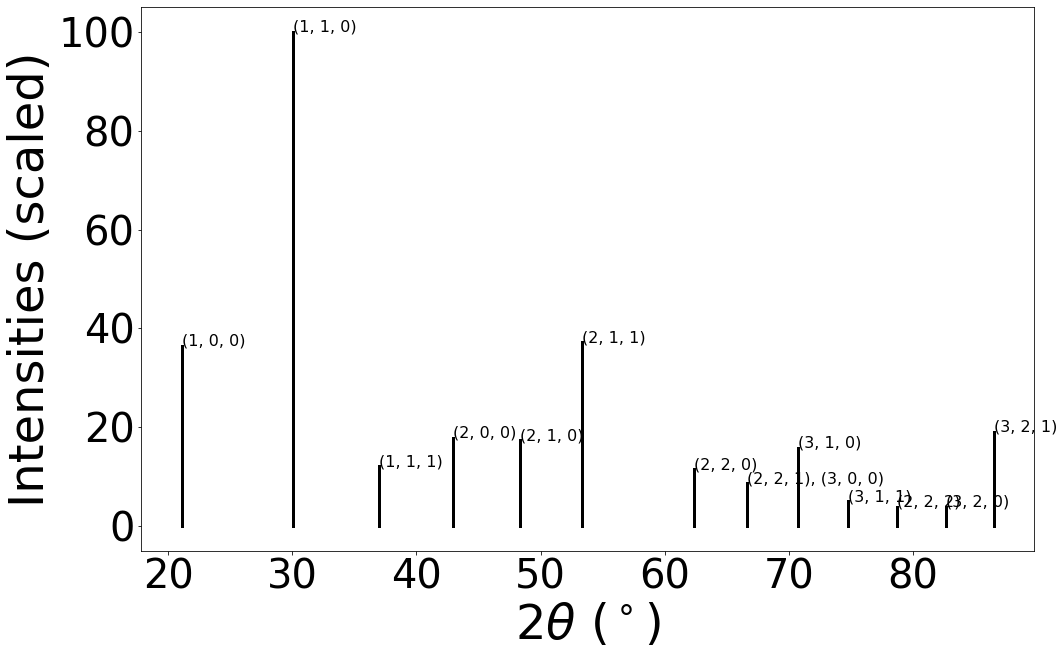

In [36]:
# Create CsCl structure
a = 4.209 #Angstrom
latt = Lattice.cubic(a)
structure = Structure(latt, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])

c = XRDCalculator()
c.show_plot(structure)


<font size=4 color='turquoise'>
   

### Ejemplo 2

<font size=4>

Para obtener estructuras de COD por el ID de COD, solo necesita saber el ID.

In [37]:
from pymatgen.ext.cod import COD
cod = COD()

In [38]:
structure = cod.get_structure_by_id(1010064)
print(structure)

Full Formula (Li8 O4)
Reduced Formula: Li2O
abc   :   4.610000   4.610000   4.610000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Li+   0.25  0.25  0.25
  1  Li+   0.25  0.75  0.75
  2  Li+   0.75  0.25  0.75
  3  Li+   0.75  0.75  0.25
  4  Li+   0.75  0.75  0.75
  5  Li+   0.75  0.25  0.25
  6  Li+   0.25  0.75  0.25
  7  Li+   0.25  0.25  0.75
  8  O2-   0     0     0
  9  O2-   0     0.5   0.5
 10  O2-   0.5   0     0.5
 11  O2-   0.5   0.5   0


<font size=4>

Referencia: [pymatgen.org](https://pymatgen.org/)

Para ver algunos notebooks de ejemplo: [matgenb](http://matgenb.materialsvirtuallab.org/)
  